# measuring efficiency

In [21]:
def fib(n):
    if n == 0 or n == 1:
        return n
    else:
        return fib(n - 2) + fib(n - 1)
    
def count(f):
    def counted(n):
        counted.call_count += 1
        return f(n)
    counted.call_count = 0
    return counted

In [2]:
fib = count(fib)
fib(5)

5

In [3]:
fib.call_count

15

In [4]:
fib(30)

832040

In [5]:
fib.call_count

2692552

# memoization

remember the results that have been computed before

In [6]:
def memo(f):
    cache = {}
    def momoized(n):
        if n not in cache:
            cache[n] = f(n)
        return cache[n]
    return momoized

In [7]:
fib(30)

832040

In [8]:
fib = memo(fib)
fib(30)

832040

In [9]:
fib(50)

12586269025

In [10]:
fib(30)

832040

In [22]:
fib = count(fib)
counted_fib = fib
fib = memo(fib)
fib = count(fib)
fib(30)

832040

In [23]:
fib.call_count

59

In [24]:
counted_fib.call_count

31

# exponentiation

one more multiplication lets us double the problem size

In [14]:
def exp(b, n):
    if n == 0:
        return 1
    else:
        return b * exp(b, n - 1)

In [15]:
def exp_fast(b, n):
    if n == 0:
        return 1
    elif n % 2 == 0:
        return square(exp_fast(b, n // 2))
    else:
        return b * exp_fast(b, n - 1)

def square(x):
    return x * x

In [16]:
%%time
exp(2, 800)

CPU times: total: 0 ns
Wall time: 2 ms


6668014432879854274079851790721257797144758322315908160396257811764037237817632071521432200871554290742929910593433240445888801654119365080363356052330830046095157579514014558463078285911814024728965016135886601981690748037476461291163877376

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rc('font', size=16)

from timeit import repeat
from numpy import median, percentile

def plot_times(name, xs, n=15):
    f = lambda x: name + '(' + str(x) + ')'
    g = globals()

    samples = []
    for _ in range(n):
        times = lambda x: repeat(f(x), globals=g, number=1, repeat=n)
        samples.append([median(times(x)) for x in xs])
    ys = [10e3 * median(sample) for sample in zip(*samples)]

    plt.figure(figsize=(6, 4))
    plt.plot(xs, ys)
    plt.xlabel('n')
    plt.ylabel('milliseconds')

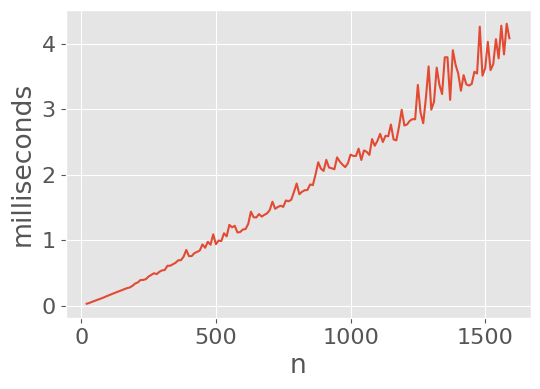

In [18]:
exp_2 = lambda n: exp(2, n)
plot_times('exp_2', range(20, 1600, 10))

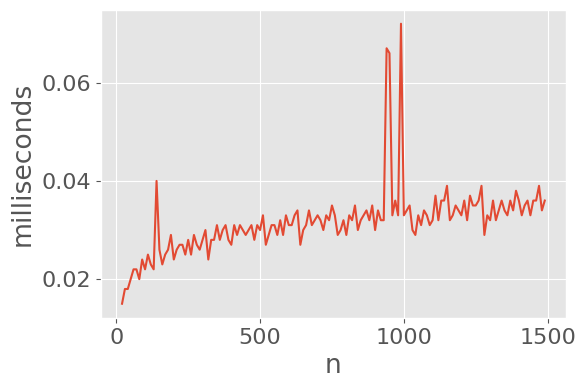

In [19]:
exp_2_fast = lambda n: exp_fast(2.0, n)
plot_times('exp_2_fast', range(20, 1500, 10))

# order of growth



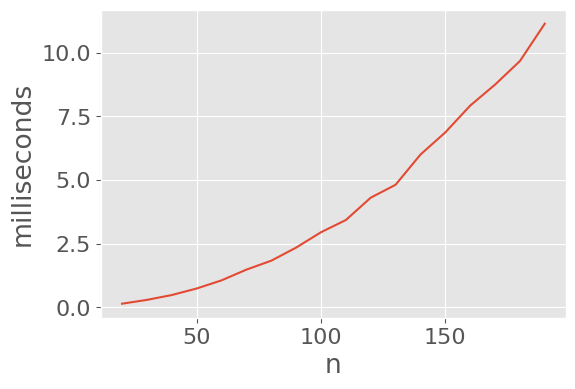

In [20]:
def overlap(a, b):
    count = 0
    for item in a:
        for other in b:
            if item == other:
                count += 1
    return count

overlap_ranges = lambda n: overlap(list(range(n)), list(range(n)))
plot_times('overlap_ranges', range(20, 200, 10))

# order of growth notation

- constant $\Theta(1), O(1)$
- linear $\Theta(n), O(n)$
- logarithmic $\Theta(\log n), O(\log n)$
- quadratic $\Theta(n^2), O(n^2)$
- exponential $\Theta(b^n), O(b^n)$



# space

consumption of space

keep the environment frames

memory that is used for other values and frames can be recycled

active environments:
- environments for any function calls currently being evaluated
- parent environments of functions named in active environments

In [25]:
def count_frames(f):
    def counted(n):
        counted.open_count += 1
        if counted.open_count > counted.max_count:
            counted.max_count = counted.open_count
        result = f(n)
        counted.open_count -= 1
        return result
    counted.open_count = 0
    counted.max_count = 0
    return counted

def fib(n):
    if n == 0 or n == 1:
        return n
    else:
        return fib(n - 2) + fib(n - 1)

In [26]:
fib = count_frames(fib)
fib(20)

6765

In [27]:
fib.open_count

0

In [28]:
fib.max_count

20